In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [120]:
def make_hist(x,options,t, tole,inten):
    
    plt.figure(figsize =(6,5))
    plt.hist(x,bins = options)
    plt.xlabel('Opinion')
    plt.ylabel('Frecuency')
    plt.xlim(0,99)
    plt.ylim(0,500)
    plt.title(f"Tolerance ={tole} and Intensity ={inten}")
    plt.savefig(f'animation_global_n1000_p100/simul_glo_n1000_p100_t{t}.png')
    plt.close()
    
    return

#Defining the creation of a new network
def nuevared(size,options):
    x = np.random.randint(0,options,size=(1,size),dtype=int)
    return(x[0])

In [131]:
options =10
size = 100
intensity = 0.9
tolerance = 3
propaganda = 8
x = nuevared(size,options)
for T in tqdm(range(0,6000)):
    
    for i in range(size):
        r = random.randint(0,size-1)
        if intensity > random.uniform(0,1):
            if abs(propaganda- x[i])<= tolerance:
                    x[i] = propaganda
        else:
            d = (x[r] - x[i])
            if abs(d) <= tolerance:
                x[i]=x[r]
                        
    crit = np.unique(np.array(x))
    
    if  T%20 ==0: 
        make_hist(x,options,T,tolerance, intensity)
        
    if len(crit) == 1 and T % 200 == 0:
        break
    
    

100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:35<00:00, 167.76it/s]


In [134]:
from PIL import Image
import imageio

#The list of image filenames to be included in the GIF
image_files= []
for T in range(0,6000,20):
    image_files.append(f'animation_global_n1000_p100/simul_glo_n1000_p100_t{T}.png')


In [135]:
#Open all the images and add them to a list
images = []
for file in tqdm(image_files):
    images.append(Image.open(file))

#Sort images by width
images.sort(key=lambda x: x.width)

# Save the images as a GIF with a specified delay between frames
imageio.mimsave("test_stop_condition_1.gif", images, duration=0.1)

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 552.80it/s]


## Test of Stop Condition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [2]:
#Defining the creation of a new network
def nuevared(size,options):
    x = np.random.randint(0,options,size=(1,size),dtype=int)
    return(x[0])

In [248]:
options =100
size = 1000
intensity = 0.9
tolerance = 50
propaganda = 80
x = nuevared(size,options)
his = []
T = 0
while T < 100000:
    for i in range(size):
        r = random.randint(0,size-1)
        if intensity > random.uniform(0,1):
            if abs(propaganda- x[i])<= tolerance:
                x[i] = propaganda
        else:
            d = (x[r] - x[i])
            if abs(d) <= tolerance:
                x[i]=x[r]
            
    if T % 500 ==0 :
        his.append(x.copy())
        
    if len(his) >= 6:
        if (his[-1]== his[-2]).all() and T >3000  :
            break
    T += 1
    
    

Done at time: 15000


In [249]:
print((his[-2]== his[-1]).all())
print((presumable== his[-1]).all())

True
True


In [250]:
(his[1]== his[-2]).all()

False

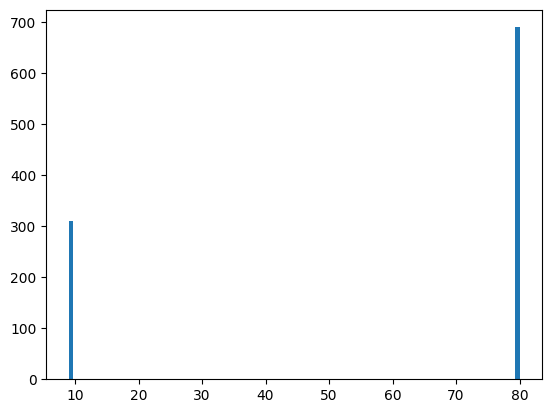

In [251]:
plt.hist(x,bins = 100)
plt.show()